## Configuration

In [1]:
from collections import Counter
from cism.cism import CISM
from cism.cism import TissueStateDiscriminativeMotifs
from cism.cism import DiscriminativeFeatureKey
import pandas as pd

FANMOD_path = "C:\\Users\\User\\source\\repos\\fanmod-cmd\\out\\build\\x64-release"
FANMOD_exe = "LocalFANMOD.exe"

raw_data_folder = './../../data'
raw_data_folder_dataset = '/melanoma_distance_100_XX'
output_dir = './../../fanmod_output'
cache_dir = './../../parse_cache'
results_dir = './../../results/melanoma_distance_100_XX'
iterations = 1000
force_run_fanmod = False
force_parse = False

In [2]:
cells_type = {
    0: 'B cell',
    1: 'CD4 APC',
    2: 'CD4 T cell',
    3: 'CD4 Treg',
    4: 'CD8 T cell',
    5: 'DCs',
    6: 'Germinal Center B cell',
    7: 'Hevs',
    8: 'MAC',
    9: 'Memory CD4 T Cell',
    10: 'NK cell',
    11: 'Neutrophil',
    12: 'Stroma',
    13: 'Tumor',
    14: 'Unidentified',
    15: 'Vessels'
}

Distant_metastases_class = {
    'NP': 'NP',
    'NN': 'NN',
    'PN': 'PN',
    'PP': 'PP',
}

class_to_color = {
    'NP': 'green',
    'NN': 'yellow',
    'PN': 'magenta',
    'PP': 'blue',
}

target_classes = ['NN', 'NP']
target_classes_str = 'NN_NP'

## Steps
1. Initiate CISM object
2. Load datasets
3. Initiate CISMTask

### Test stability of cell-cell distribution across thresholds


In [3]:
import numpy as np
import networkx as nx

def create_weight_matrix_from_motifs(discriminator,
                                     cells_type: dict,
                                     cell_identity_to_motif_hash: dict,
                                     motifs_ids: list,
                                     motifs_weight: pd.DataFrame) -> pd.DataFrame:
    pairwise_cell_types_count_matrix = pd.DataFrame(index=cells_type.values(),
                                                    columns=cells_type.values(),
                                                    dtype=float).fillna(0)

    for hash_id in list(cell_identity_to_motif_hash.keys()):
        motifs = cell_identity_to_motif_hash[hash_id]
        for motif_id in motifs:
            if motif_id not in motifs_ids:
                continue
            print(f'motif_id: {motif_id}, hash_id: {hash_id}')
            target_motif = discriminator.cism.motifs_dataset[discriminator.cism.motifs_dataset.ID == motif_id].iloc[0].motif
            from cism.helpers import string_base64_pickle
            target_motif = string_base64_pickle(target_motif)
            for edge in nx.Graph(target_motif).edges():
                left_node = target_motif.nodes[edge[0]]['type']
                right_node = target_motif.nodes[edge[1]]['type']
                pairwise_cell_types_count_matrix.loc[cells_type[int(left_node)], cells_type[int(right_node)]] += motifs_weight.loc[motif_id]

    return pairwise_cell_types_count_matrix/np.matrix(pairwise_cell_types_count_matrix).sum()

In [15]:
shared_percentage_th = 0.3

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

group NN size: 4
group NP size: 7
motif_id: 6921708, hash_id: -4413345290641661858
motif_id: 2645164, hash_id: 6212072527860847364
motif_id: 531788, hash_id: -5986911592041500802
motif_id: 3975660, hash_id: 2005492494755993495


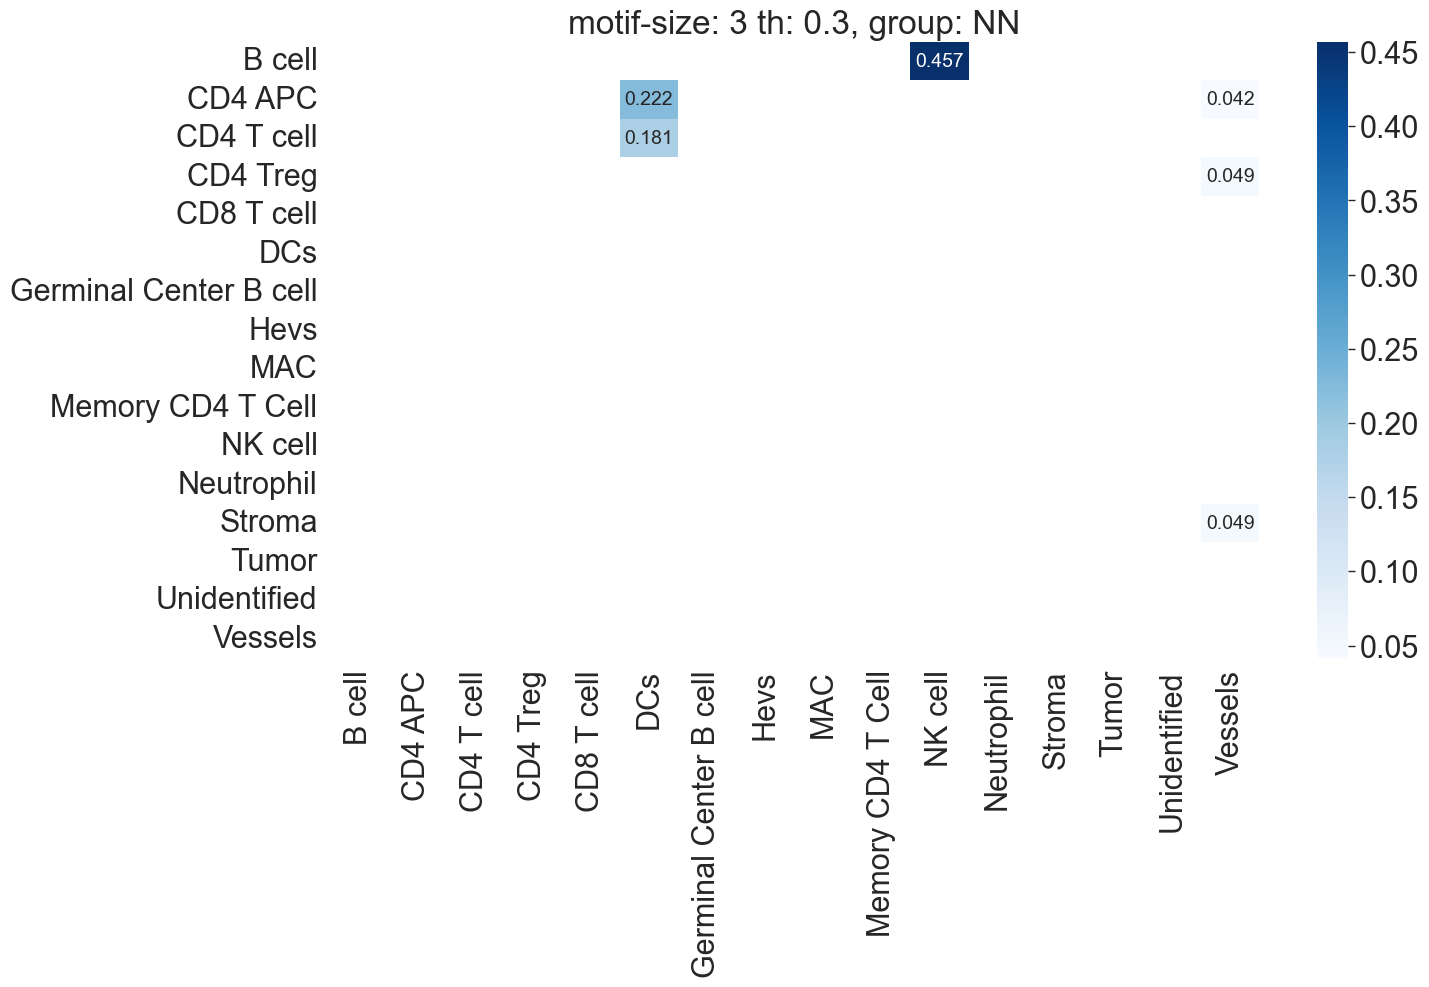

motif_id: 3988780, hash_id: -6237108686098134397
motif_id: 8986092, hash_id: 5663825024872474880
motif_id: 5551308, hash_id: -8313164967077578061
motif_id: 548044, hash_id: 8788081130466924170
motif_id: 4791788, hash_id: -2359384092946165225
motif_id: 1845516, hash_id: -8045960498915075151
motif_id: 19496428, hash_id: -5143620414521278193


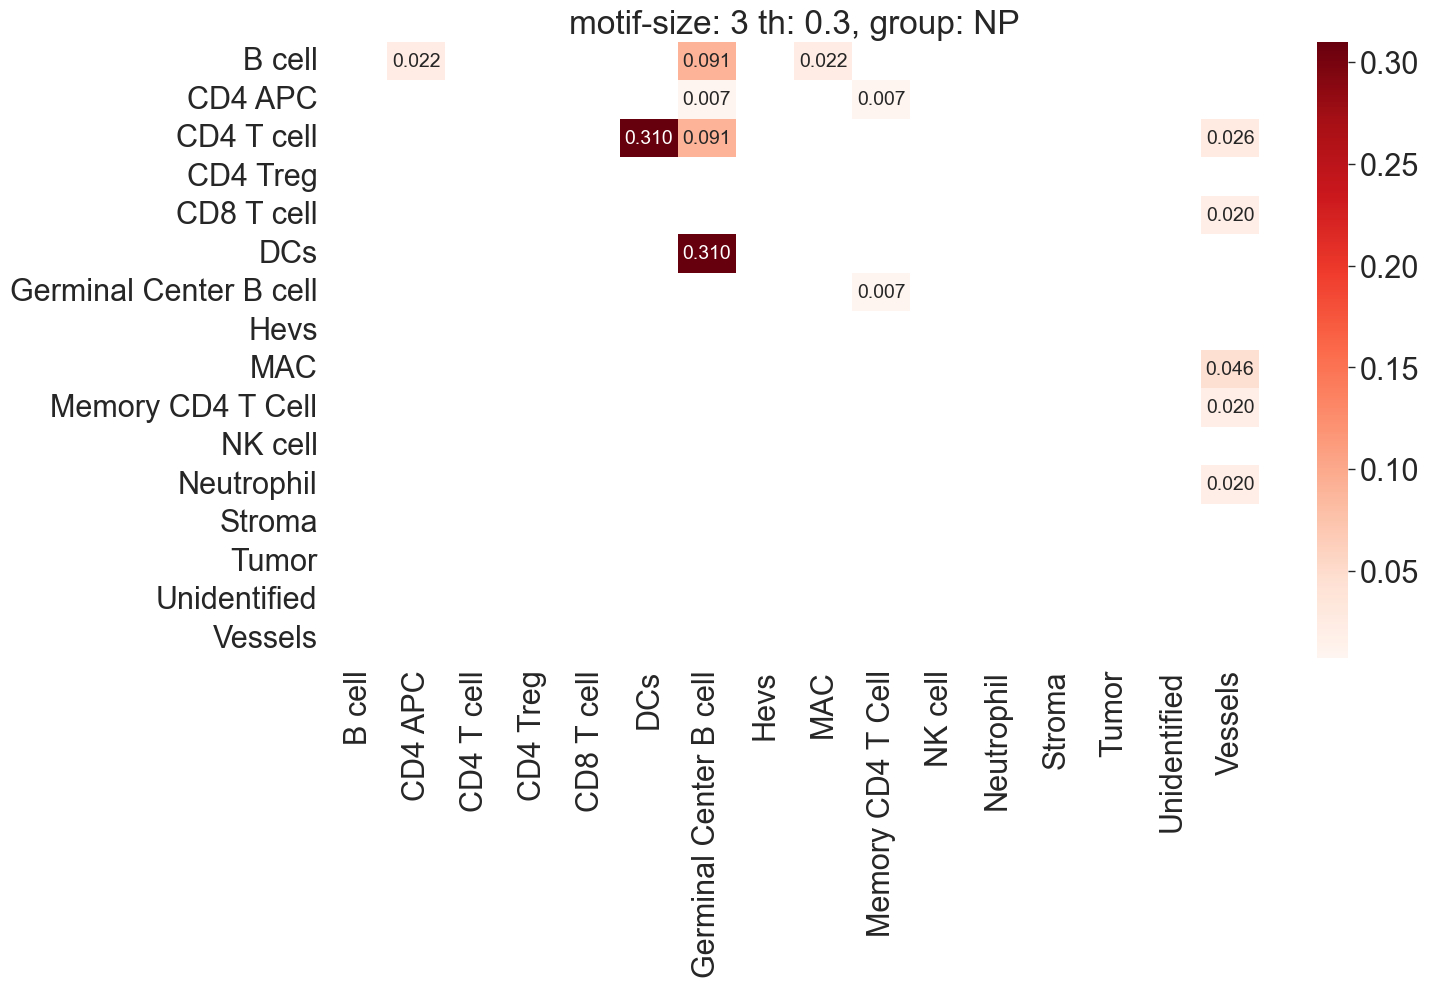

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

group NN size: 49
group NP size: 84
motif_id: 7269339596, hash_id: 8173372064104969799
motif_id: 11581149676, hash_id: 8935360881190759404
motif_id: 11041664492, hash_id: 8935360881190759404
motif_id: 13462215148, hash_id: 1823101890295899706
motif_id: 15918060012, hash_id: 1400127824519001724
motif_id: 5388824012, hash_id: -3783821207252436004
motif_id: 37396624844, hash_id: -2759409616410145012
motif_id: 10231641452, hash_id: 4998471879349489886
motif_id: 2431142124, hash_id: -2923136233108592414
motif_id: 2451664140, hash_id: -6362785185076007102
motif_id: 6749250860, hash_id: -5203036210348590078
motif_id: 7829866796, hash_id: 8930257992075820356
motif_id: 5397179692, hash_id: 8451560770446101120
motif_id: 19644696876, hash_id: 7006577083503962325
motif_id: 19669846348, hash_id: 4092891317731859338
motif_id: 38456704332, hash_id: -8713142649215636994
motif_id: 36040785228, hash_id: -8713142649215636994
motif_id: 20208317932, hash_id: -2575233601865130474
motif_id: 9173710316, hash_

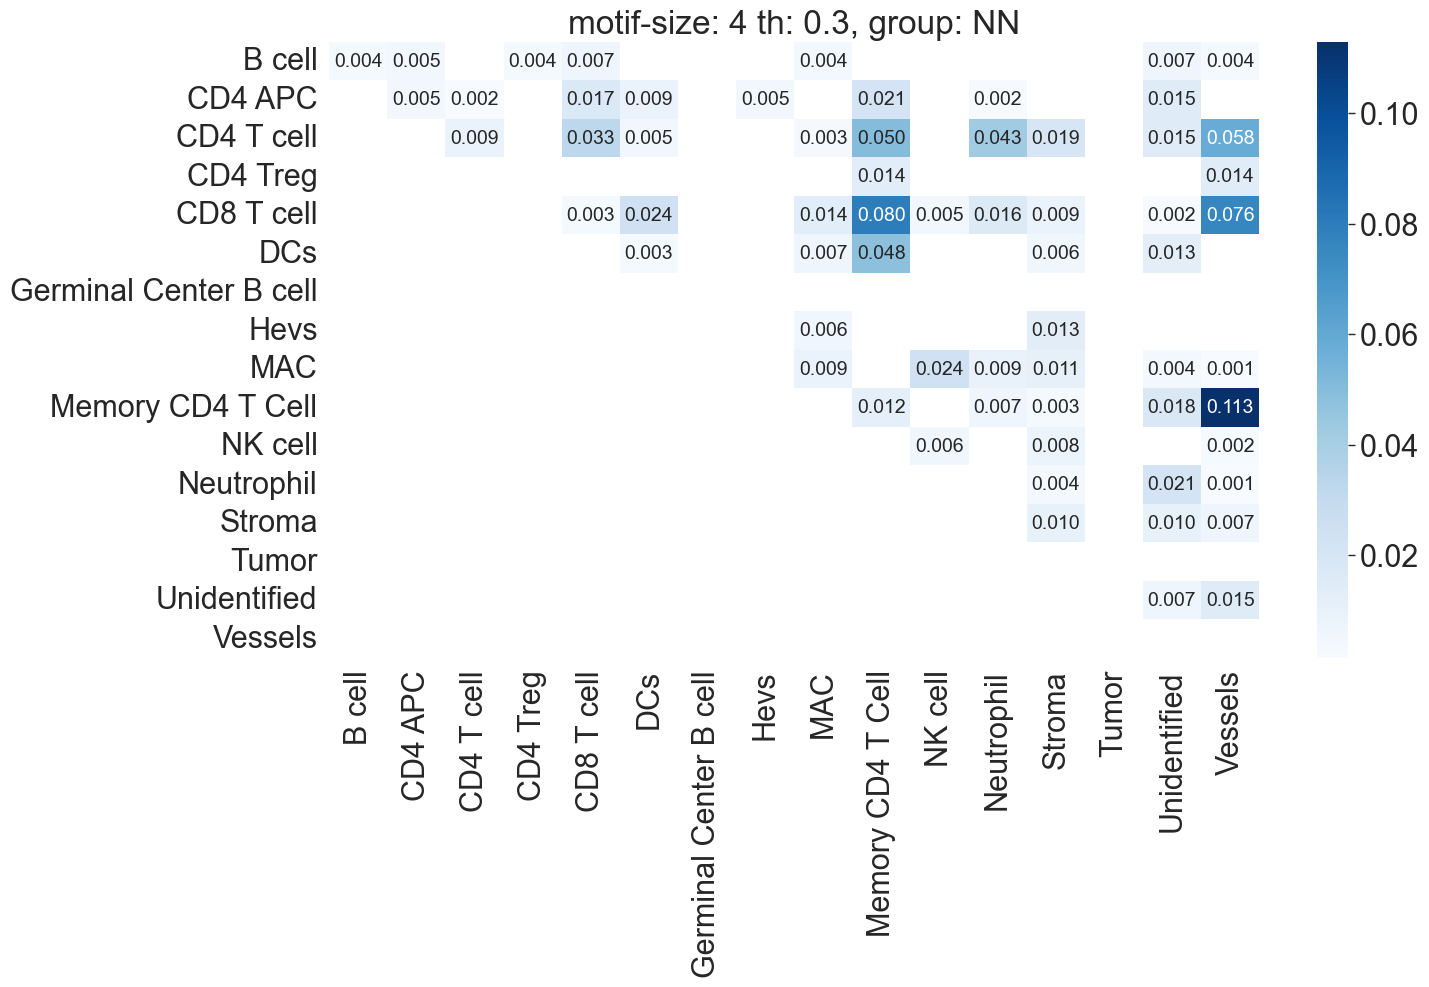

motif_id: 9167247628, hash_id: -660105732125753416
motif_id: 16402942348, hash_id: 2559706041182080051
motif_id: 16939817356, hash_id: 2559706041182080051
motif_id: 9738848652, hash_id: -7984719251872030910
motif_id: 16402958732, hash_id: -1798096907293340332
motif_id: 1115294188, hash_id: -7281305230294004616
motif_id: 16417793484, hash_id: 7779624149145954569
motif_id: 37392945644, hash_id: -8025382871041942634
motif_id: 5391377868, hash_id: 3914887218286053913
motif_id: 5443832300, hash_id: -610278155171468439
motif_id: 19667789260, hash_id: 5034151937619604283
motif_id: 3549586892, hash_id: -4393520322829233331
motif_id: 18863542764, hash_id: -4094262317725730701
motif_id: 16950825452, hash_id: 1823101890295899706
motif_id: 1121641836, hash_id: -6305563230588491547
motif_id: 3539660140, hash_id: -6305563230588491547
motif_id: 3024802188, hash_id: -1844936782012438302
motif_id: 2487936396, hash_id: -1844936782012438302
motif_id: 15901249932, hash_id: -2937209521203962343
motif_id: 3

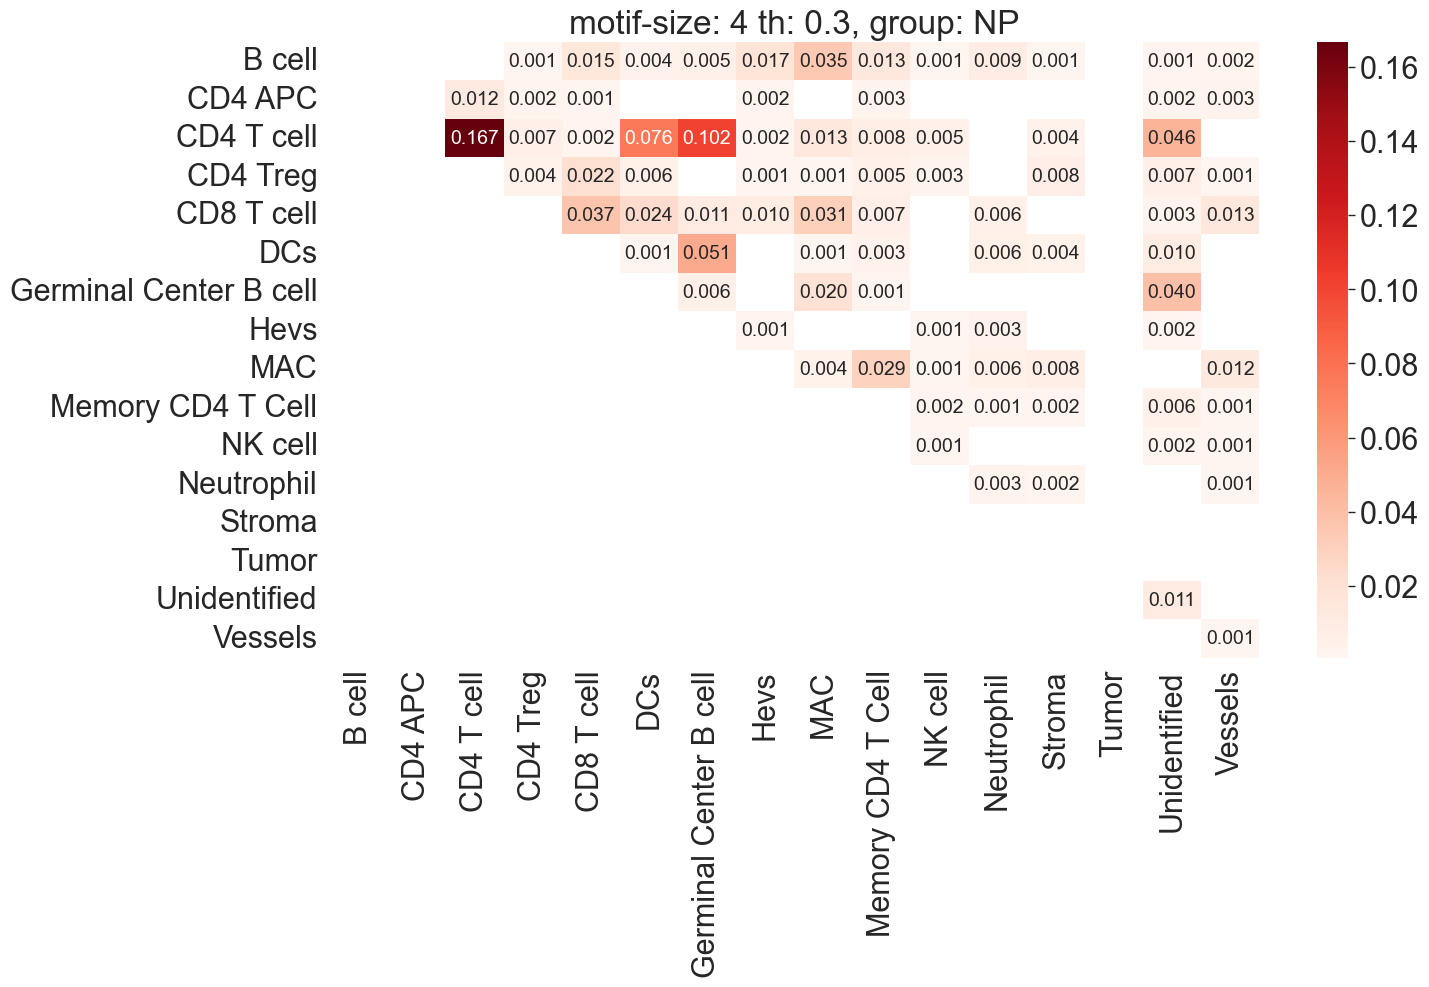

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

group NN size: 137
group NP size: 102
motif_id: 83638344801644, hash_id: -6873248133125190918
motif_id: 81447891548524, hash_id: -6873248133125190918
motif_id: 83646910616940, hash_id: -6873248133125190918
motif_id: 53963304176012, hash_id: 182596123194638611
motif_id: 62751898896780, hash_id: -8582874457260478313
motif_id: 288374060818892, hash_id: 7710208002406967212
motif_id: 286179314700748, hash_id: 7710208002406967212
motif_id: 286179332526540, hash_id: 7710208002406967212
motif_id: 297163709293004, hash_id: 7710208002406967212
motif_id: 77043281994188, hash_id: 7502544748368918668
motif_id: 11127323140556, hash_id: -4490234837285877749
motif_id: 100204038889932, hash_id: -6437327686927151344
motif_id: 100195446875596, hash_id: -6437327686927151344
motif_id: 60748308357580, hash_id: 6062891131347118257
motif_id: 8914517400012, hash_id: -9027772739898332537
motif_id: 79317597214060, hash_id: -1119830660563827886
motif_id: 100195421711724, hash_id: -1119830660563827886
motif_id: 10

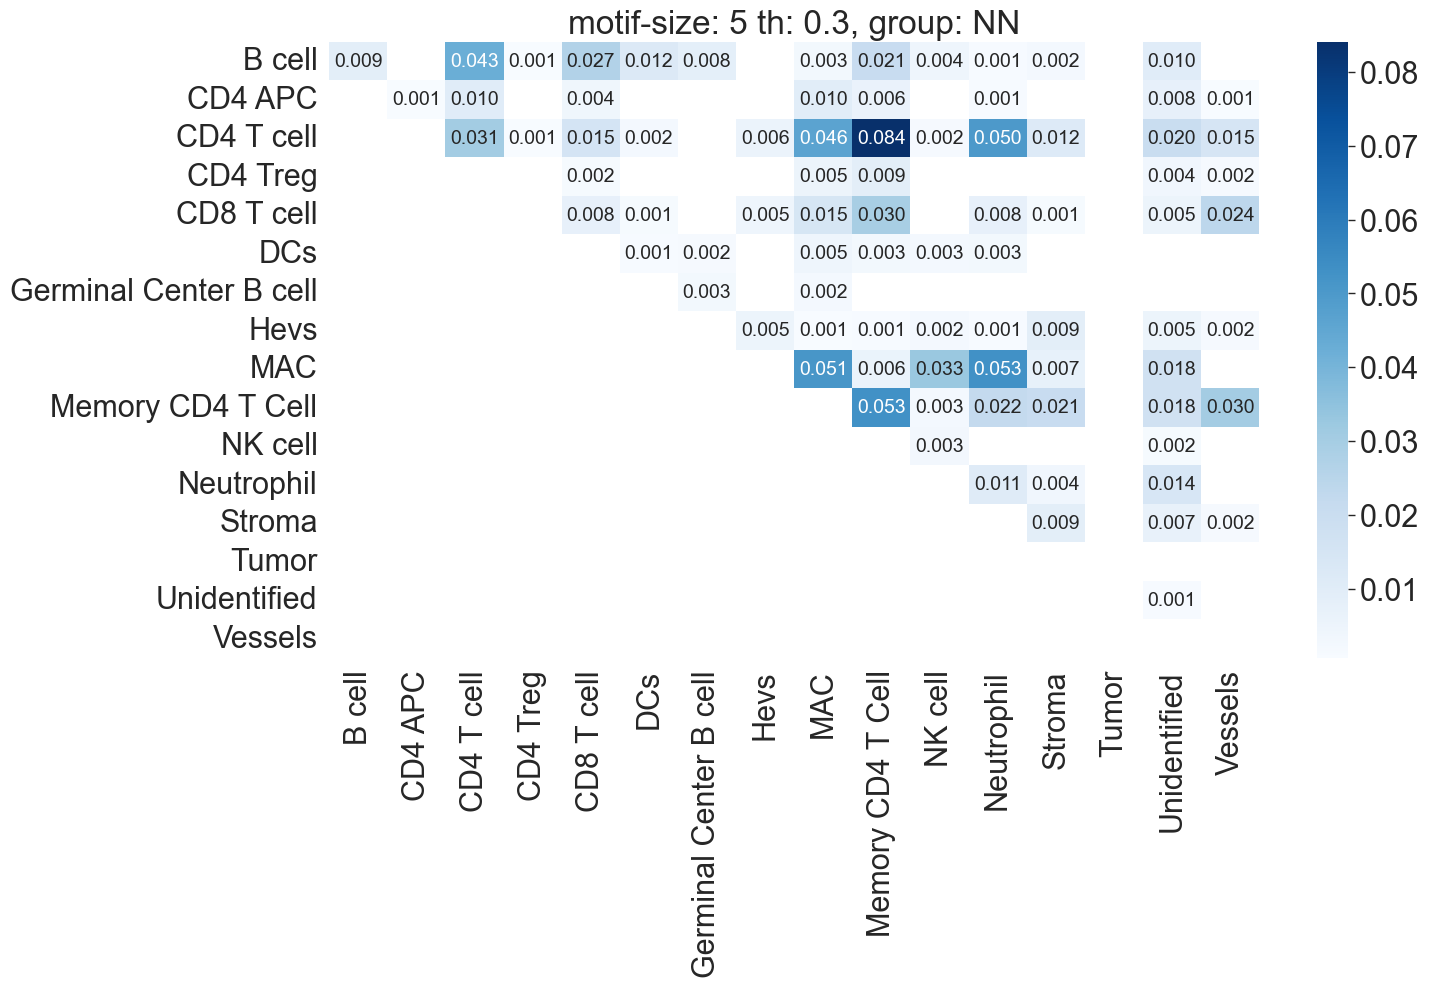

motif_id: 23211215734060, hash_id: 2152140428075761759
motif_id: 27773710419244, hash_id: -5924900421004937820
motif_id: 156357702918604, hash_id: -1612947025107101431
motif_id: 191497767166412, hash_id: -247046222118762366
motif_id: 18985124137260, hash_id: -9088455492826980356
motif_id: 27769379804460, hash_id: -9088455492826980356
motif_id: 72640867169612, hash_id: -5184930613754376088
motif_id: 11015535567212, hash_id: 733284310153526004
motif_id: 8829381480812, hash_id: 733284310153526004
motif_id: 21046547932620, hash_id: -5562288200077420028
motif_id: 25434945432012, hash_id: -5562288200077420028
motif_id: 91484078794188, hash_id: 6518243765023860343
motif_id: 319176689804748, hash_id: 2527721609355561703
motif_id: 8845807358444, hash_id: -4079253698426975765
motif_id: 23108312664428, hash_id: 5277632026797230419
motif_id: 170582276793804, hash_id: -8424243962385195558
motif_id: 154093919343052, hash_id: -8424243962385195558
motif_id: 172785599189452, hash_id: -84242439623851955

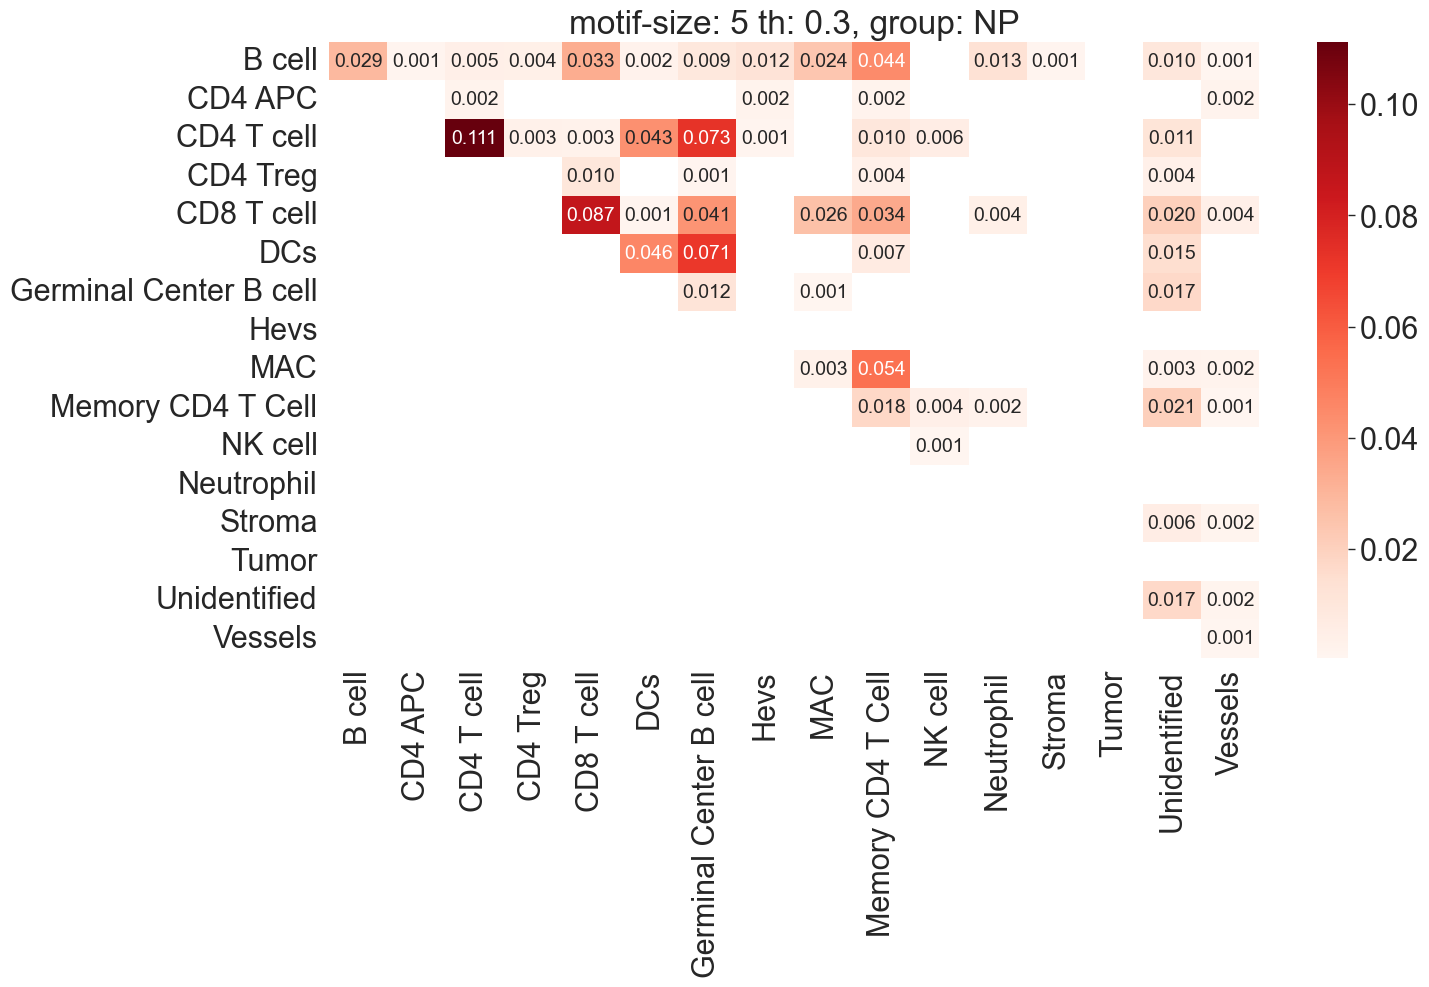

In [19]:
from cism.cism import DiscriminativeFeatureKey, HardDiscriminativeFC
import seaborn as sns
from matplotlib import pyplot as plt
from cism import helpers

sns.set(font_scale=2)
sns.set_style("white")
sns.set_context("paper", font_scale=2.5)

group_NN = []
group_NP = []

for motif_size in [3, 4, 5]:
    cism = CISM(fanmod_exe=FANMOD_exe,
            fanmod_path=FANMOD_path,
            network_dataset_root_path=raw_data_folder,
            fanmod_output_root_path=output_dir,
            fanmod_cache_root_path=cache_dir,
            motif_size=motif_size,
            iterations=iterations)

    # adding Melanoma dataset
    cism.add_dataset(raw_data_folder_dataset, 'Disease', 'Melanoma', force_run_fanmod=force_run_fanmod, force_parse=force_parse, n_jobs=1, quantile_threshold=1)

    discriminator = TissueStateDiscriminativeMotifs(cism=cism,
                                                tissue_state_csv_path=raw_data_folder + raw_data_folder_dataset + '/patient_class.csv',
                                                tissue_state_to_string=Distant_metastases_class,
                                                common_cells_type=cells_type)

    discriminator.cism.motifs_dataset['Total'] = discriminator.cism.motifs_dataset['Count']/discriminator.cism.motifs_dataset['Freq']

    relevant_patients = discriminator.get_patients_class(target_classes)

    featureConf = HardDiscriminativeFC(
                    extract_by=DiscriminativeFeatureKey.STRUCTURE_AND_CELL_IDENTITIES,
                    use_cells_type_composition=False,
                    use_motifs=True,
                    shared_percentage=shared_percentage_th,
                    max_class_features=30,
                    labels=target_classes)

    motif_space_features = discriminator.get_features(feature_conf=featureConf,
                                                      exclude_patients=[],
                                                      n_jobs=1)

    all_motif_features = []
    for idx, row in motif_space_features.iterrows():
        all_motif_features += row['features']
    all_motif_features = list(set(all_motif_features))

    motif_to_cells_identity_hash = {}
    for motif_id in all_motif_features:
        motif_to_cells_identity_hash[motif_id] = discriminator.cism.motifs_dataset[discriminator.cism.motifs_dataset.ID == motif_id].colors_vec_hash.iloc[0]

    cell_identity_to_motif_hash = {}
    for k, v in motif_to_cells_identity_hash.items():
        cell_identity_to_motif_hash[v] = cell_identity_to_motif_hash.get(v, []) + [k]


    new_freq_table = discriminator.cism.motifs_dataset[
        (discriminator.cism.motifs_dataset.ID.isin(all_motif_features)) &
        (discriminator.cism.motifs_dataset['Patient_uId'].isin(relevant_patients.index))].groupby(['Patient', 'ID'], observed=True)[['Count', 'Total']].sum().reset_index()

    new_freq_table['Freq'] = new_freq_table['Count']/new_freq_table['Total']
    motif_mean_count = new_freq_table.groupby('ID')['Freq'].mean()

    group_a_motifs = []
    group_b_motifs = []

    relevant_patients = discriminator.get_patients_class(target_classes)
    for motif_id in all_motif_features:
        patients_ids = discriminator.cism.motifs_dataset[
            (discriminator.cism.motifs_dataset.ID == motif_id) &
            (discriminator.cism.motifs_dataset['Patient_uId'].isin(relevant_patients.index))]['Patient_uId'].unique()
        groups_ids = map(lambda x: relevant_patients.loc[x]['patient_class'], patients_ids)
        counter = Counter(groups_ids)
        if max(counter, key=counter.get) == target_classes[0]:
            group_a_motifs.append(motif_id)
        else:
            group_b_motifs.append(motif_id)

    plt.figure(figsize=(15,8))
    
    print(f'group {target_classes[0]} size: {len(group_a_motifs)}')
    print(f'group {target_classes[1]} size: {len(group_b_motifs)}')

    df = create_weight_matrix_from_motifs(
                        discriminator=discriminator,
                        cells_type=cells_type,
                        cell_identity_to_motif_hash=cell_identity_to_motif_hash,
                        motifs_ids=group_a_motifs,
                        motifs_weight=motif_mean_count)
    group_NN.append(df)
    plt.title(f'motif-size: {motif_size} th: {shared_percentage_th}, group: {target_classes[0]}')
    ax = sns.heatmap(df, annot=True, mask=df==0, cmap='Blues', annot_kws={'size': 14}, fmt=".3f")
    plt.show()
    plt.close()

    plt.figure(figsize=(15,8))
    df = create_weight_matrix_from_motifs(
                            discriminator=discriminator,
                            cells_type=cells_type,
                            cell_identity_to_motif_hash=cell_identity_to_motif_hash,
                            motifs_ids=group_b_motifs,
                            motifs_weight=motif_mean_count)
    group_NP.append(df)
    plt.title(f'motif-size: {motif_size} th: {shared_percentage_th}, group: {target_classes[1]}')
    ax = sns.heatmap(df, annot=True, mask=df==0, cmap='Reds', annot_kws={'size': 14}, fmt=".3f")
    plt.show()
    plt.close()

    Calculate the correlation between i, i+1 and i, j

In [6]:
from scipy import stats

def upper(df):
    '''Returns the upper triangle of a correlation matrix.
    You can use scipy.spatial.distance.squareform to recreate matrix from upper triangle.
    Args:
      df: pandas or numpy correlation matrix
    Returns:
      list of values from upper triangle
    '''
    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

print(f'fraction: {shared_percentage_th}')
print(f'NN spearman 3-4')
print(stats.spearmanr(upper(group_NN[0]), upper(group_NN[1])))
print(f'NN spearman 4-5')
print(stats.spearmanr(upper(group_NN[1]), upper(group_NN[2])))

print(f'NP spearman 3-4')
print(stats.spearmanr(upper(group_NP[0]), upper(group_NP[1])))
print(f'NP spearman 4-5')
print(stats.spearmanr(upper(group_NP[1]), upper(group_NP[2])))

NN spearman 3-4
SignificanceResult(statistic=0.08084515791492428, pvalue=0.38006168593448675)
NN spearman 4-5
SignificanceResult(statistic=0.5346746995600795, pvalue=3.169397962322536e-10)
NP spearman 3-4
SignificanceResult(statistic=0.19605902965216446, pvalue=0.031863930561310934)
NP spearman 4-5
SignificanceResult(statistic=0.6434844774814268, pvalue=2.261303996546862e-15)


In [20]:
print(f'fraction: {shared_percentage_th}')
print(f'NN spearman 3 NN NP')
print(stats.spearmanr(upper(group_NN[0]), upper(group_NP[0])))
print(f'NN spearman 4 NN NP')
print(stats.spearmanr(upper(group_NN[1]), upper(group_NP[1])))
print(f'NN spearman 5 NN NP')
print(stats.spearmanr(upper(group_NN[2]), upper(group_NP[2])))

fraction: 0.3
NN spearman 3 NN NP
SignificanceResult(statistic=0.04859250283714423, pvalue=0.5981629524263459)
NN spearman 4 NN NP
SignificanceResult(statistic=0.17118193996095338, pvalue=0.06156718549975543)
NN spearman 5 NN NP
SignificanceResult(statistic=0.3503623064431938, pvalue=8.747119694243467e-05)


In [10]:
print(f'fraction: {shared_percentage_th}')

print(f'NN spearman 4-5')
print(stats.spearmanr(upper(group_NN[0]), upper(group_NN[1])))

print(f'NP spearman 4-5')
print(stats.spearmanr(upper(group_NP[0]), upper(group_NP[1])))

fraction: 0.4
NN spearman 4-5
SignificanceResult(statistic=0.4896092541556854, pvalue=1.3865923495868607e-08)
NP spearman 4-5
SignificanceResult(statistic=0.521376277430933, pvalue=1.0240827804511334e-09)


In [13]:
print(f'fraction: {shared_percentage_th}')

print(f'NN spearman 4-5')
print(stats.spearmanr(upper(group_NN[0]), upper(group_NN[1])))

print(f'NP spearman 4-5')
print(stats.spearmanr(upper(group_NP[0]), upper(group_NP[1])))

fraction: 0.46
NN spearman 4-5
SignificanceResult(statistic=0.4125613095221723, pvalue=2.8356677812990464e-06)
NP spearman 4-5
SignificanceResult(statistic=0.3952994253461196, pvalue=7.882572153513647e-06)
